In [41]:
cd "D:\brAInTek\CVDL\OpenCV\02_coin_count"

D:\brAInTek\CVDL\OpenCV\02_coin_count


In [42]:
#import Libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [43]:
#!pip install imutils

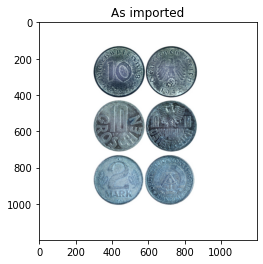

In [44]:
#image loading
image = cv2.imread("coin_set1.jpeg")
plt.title('As imported')
plt.imshow(image)

In [45]:
#image preprocessing
image_blur = cv2.medianBlur(image,25)

image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)


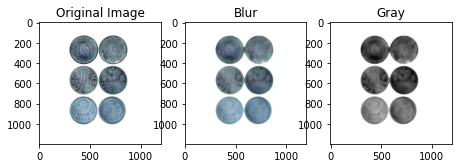

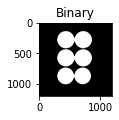

In [46]:
#Plot Image
plt.figure(figsize=(10,6))
plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(image,cmap='gray')
plt.subplot(1,4,2)
plt.title('Blur')
plt.imshow(image_blur,cmap='gray')
plt.subplot(1,4,3)
plt.title('Gray')
plt.imshow(image_blur_gray,cmap='gray')
plt.show()
plt.subplot(1,4,4)
plt.title('Binary')
plt.imshow(image_thresh,cmap='gray')
plt.show()

In [47]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 
#dilate =  cv2.dilate(image_thresh,kernel,iterations = 1)

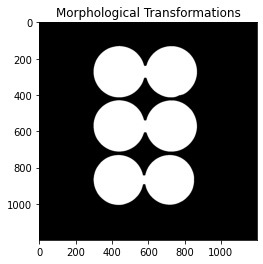

In [49]:
plt.title('Morphological Transformations')
plt.imshow(opening,cmap='gray')
plt.show()


In [50]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)


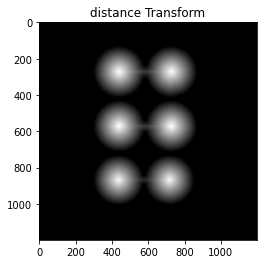

In [52]:
plt.title('distance Transform')
plt.imshow(dist_transform,cmap='gray')
plt.show()


In [53]:
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

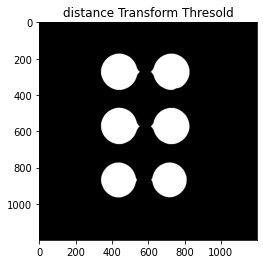

In [54]:
plt.title('distance Transform Thresold')
plt.imshow(last_image,cmap='gray')
plt.show()

In [55]:
cnts = cv2.findContours(last_image, cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
print(type(cnts))


<class 'tuple'>


In [56]:
import imutils
cnts2 = imutils.grab_contours(cnts)
print(type(cnts2))


<class 'tuple'>


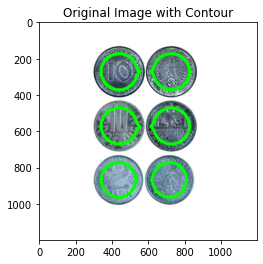

In [57]:
cv2.drawContours(image, cnts2, -1, (0,255,0), 15)
plt.title('Original Image with Contour')
plt.imshow(image,cmap='gray')

In [58]:
number_of_objects_in_image= len(cnts2)

print ("The number of objects in this image: ", str(number_of_objects_in_image))

The number of objects in this image:  6


In [59]:
for (i, c) in enumerate(cnts2):
    ((x, y), r) = cv2.minEnclosingCircle(c)
    #cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 255), 3)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 5)

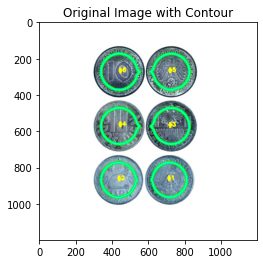

In [60]:
cv2.drawContours(image, cnts2, -1, (0,255,255), 5)
plt.title('Original Image with Contour')
plt.imshow(image,cmap='gray')